# CEAD ML project on the Ringenprinter. 
#### Welcome to the Notebook in which I will explore and visualize the data of the collected data.  

#### Material: PET-G 30% Glass Fiber
#### Dataset: PETG30GF  grote set!, 02-11-2022




## Wat zijn de korte termijn doelen te bereiken met de DATA ? 

- voorspellende functie: geef een random data punt, wat is de bead-breedte?
- voorspellende functie: geef een set van 2 RPMs, hoe ziet het verloop daar tussen uit?
    - mean van de gemeten sprongen. of: fit een sigmoid en laat deze tussen begin rpm en eind rpm voorspelling (via lin/kwad rpm/breedte voorspelling) lopen
- voorspellende functie: geef een (rpm, extr: temp, extr: materiaal, extr: hoogte, extr: nozzle maat, what else?), what is breedte?
- 

## TO DO's 

- class compleet maken voor instant analyse.
    - comment op wat welke functie doet.
    - maak een help() functie die alle functie signatures en comments print. 
        - dat betekend ''' ... ''' onder de signature voltypen van class en functie.
        - 
- -. - 

### Have Done's
- puntenwolk trimmen en recht lijn fitten, ook poly gedaan
- correctie voor slijtende plaat doen- puntenwolk trimmen en recht lijn fitten
- correctie voor slijtende plaat doen
- import functie aanmaken met als er geen start/stop is gegeven, dat dan alles wordt geimporteerd
- maak soort van metric hoe lang een transitie er over doet om bijvoorbeeld +- 0.3mm in de buurt van de voorspelde waarde te komen.

## Imports and Settings

In [1]:
# imports
# system related
import sys
import subprocess
import importlib

# basics
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
import itertools
from datetime import datetime
from time import time


# ml related
from scipy import stats
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

# import scripts and functions
from functions import *
import TransitionAnalyse
from TransitionAnalyse import TransitionAnalyse as TA

print('imports succesfull')

imports succesfull


In [2]:
# settings of pandas, usefull for data exploration
pd.options.display.width = 0
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 50)
# if reset is required:
# pd.reset_option('all')

# increasing standard image size
matplotlib.rcParams['figure.figsize'] = (14, 7)

## Import and Preprocessing data

data set not filtered on time


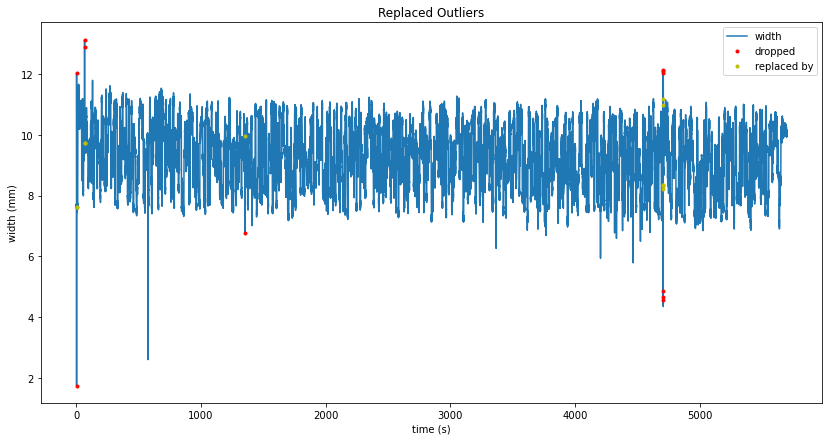

outliers detected and replaced
data median filtered
index reset
index reset


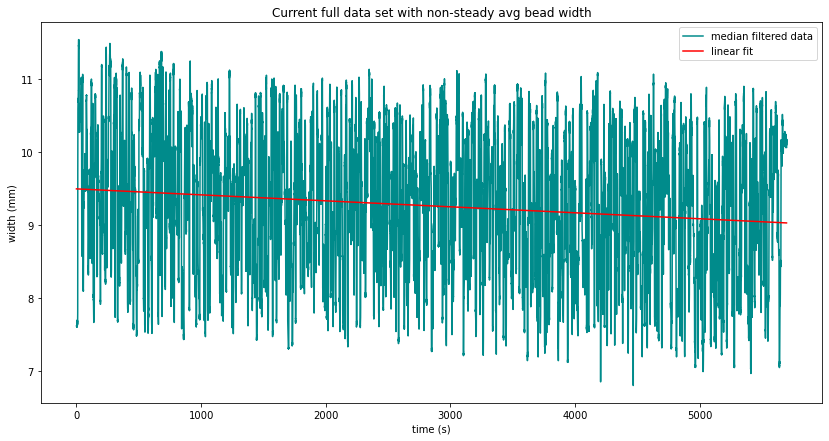

linear change over time in avg. width corrected
a, b = [5.05910459e-19], [9.49833254]


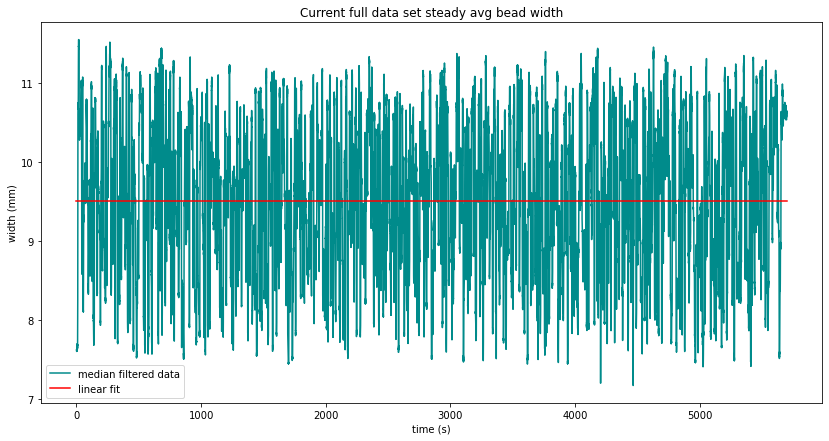

data set not filtered on time
outliers detected and replaced
index reset
index reset

import and preprocessing data succesfull


In [3]:
# Defining import variables, _s stands for small
loc_s = '../data/petg30gs-2022-11-02.csv'
start_s = 1667393458.05
end_s = 1667399157.2

# import, filter, outlier replacement and median filtering on bead_width (mm)
df_s = import_csv_filt(loc_s, start_s, end_s, plot_outliers=True, correct_hight = True, plot_correction=True, outlier_window = 8)

df_s_no_filt = import_csv_filt(loc_s, start_s, end_s, median_filt=False, outlier_window = 8)

print('\nimport and preprocessing data succesfull')

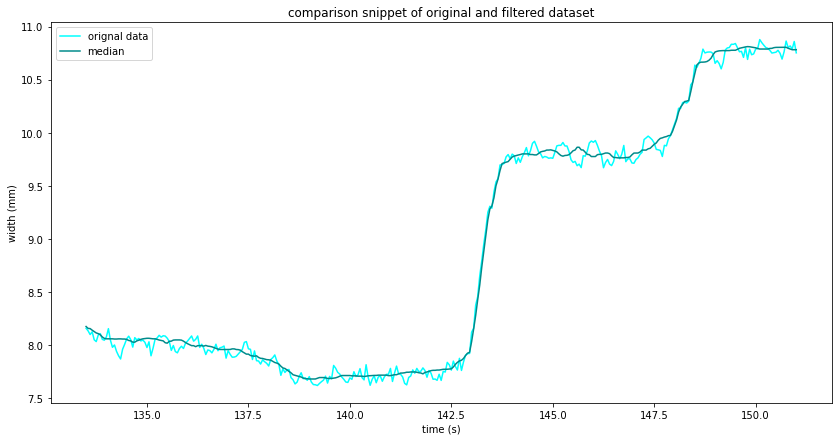

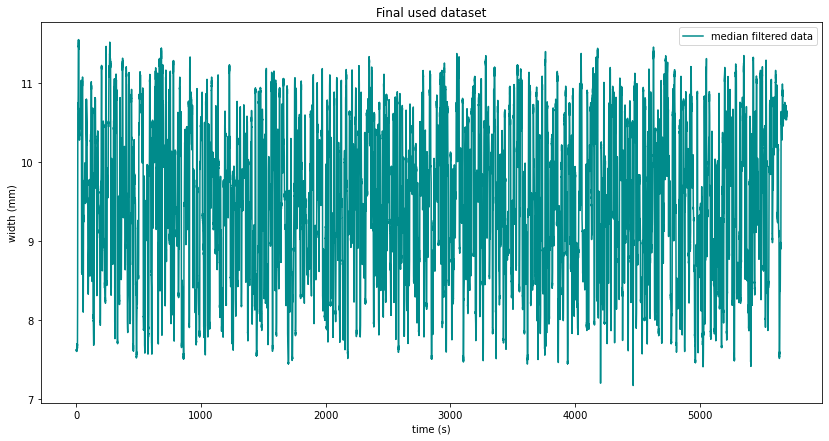

In [4]:
filter_length = 20
head_tails = int(filter_length/2)

# not used
# bead_gauss = df_s['width'].rolling(window=filter_length, win_type='gaussian', center=True).mean(std=5)
# bead_median = df_s['width'].rolling(window=filter_length, center=True).median()


plt.plot(df_s_no_filt.loc[2650:3000, 'time'], df_s_no_filt.loc[2650:3000, 'width'], 'cyan', label='orignal data')
plt.plot(df_s.loc[2650:3000, 'time'], df_s.loc[2650:3000, 'width'], 'darkcyan', label='median')
plt.title('comparison snippet of original and filtered dataset')
plt.xlabel('time (s)')
plt.ylabel('width (mm)')
plt.legend()
plt.show()

plt.plot(df_s.loc[:, 'time'], df_s.loc[:, 'width'], 'darkcyan', label='median filtered data')
plt.title('Final used dataset')
plt.xlabel('time (s)')
plt.ylabel('width (mm)')
plt.legend()
plt.show()


## Exploration

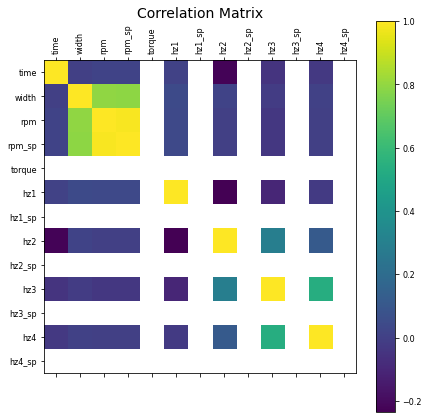

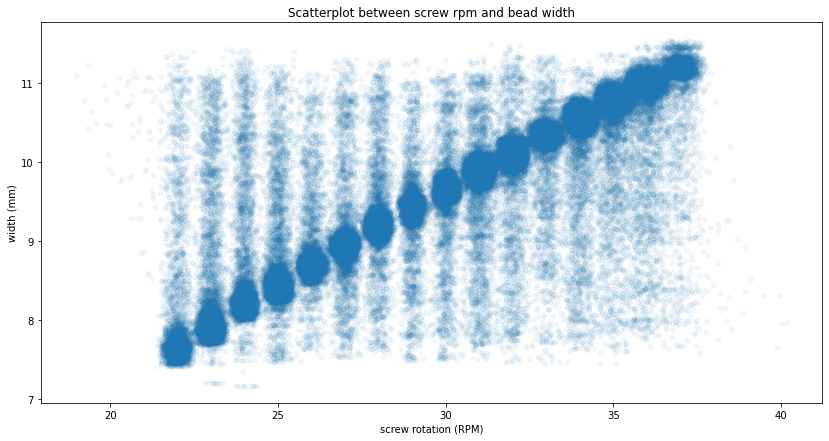

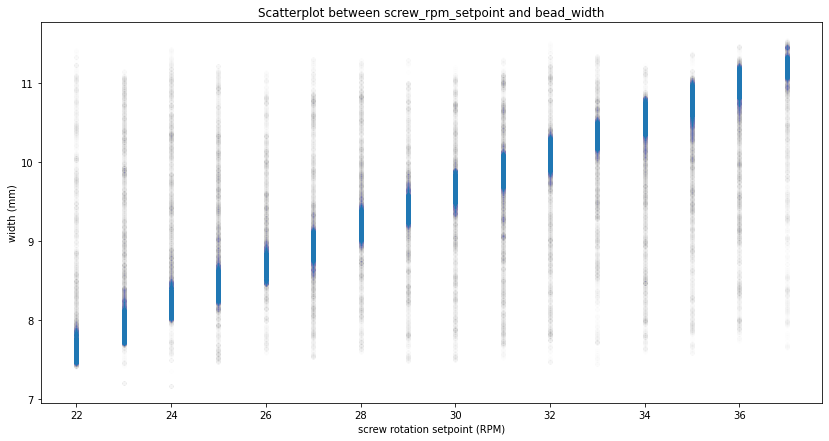

<Figure size 432x360 with 0 Axes>

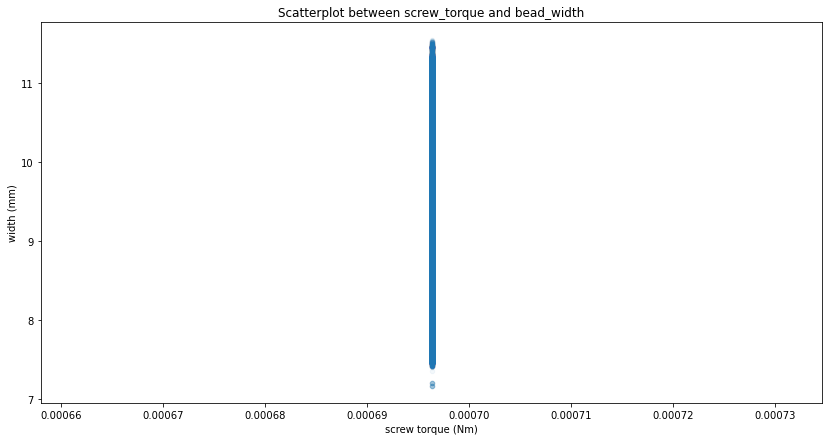

In [5]:
# plots

plt.matshow(df_s.corr())
plt.xticks(range(df_s.select_dtypes(['number']).shape[1]), df_s.select_dtypes(['number']).columns, fontsize=8, rotation=90)
plt.yticks(range(df_s.select_dtypes(['number']).shape[1]), df_s.select_dtypes(['number']).columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=8)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

df_s.plot.scatter(x='rpm', y='width', alpha = 0.05)
plt.title('Scatterplot between screw rpm and bead width')
plt.xlabel('screw rotation (RPM)')
plt.ylabel('width (mm)')
plt.show()

df_s.plot.scatter(x='rpm_sp', y='width', alpha = 0.005)
plt.title('Scatterplot between screw_rpm_setpoint and bead_width')
plt.xlabel('screw rotation setpoint (RPM)')
plt.ylabel('width (mm)')
plt.show()


f = plt.figure(figsize=(6, 5))
df_s.plot.scatter(x='torque', y='width', alpha = 0.05)
plt.title('Scatterplot between screw_torque and bead_width')
plt.xlabel('screw torque (Nm)')
plt.ylabel('width (mm)')
plt.show()


## Filtering on used features only and adding history to selected features

In [6]:
# filtering dataset so only used columns are present
columns_to_keep = ['width', 'rpm']

df_s_lean = df_s[columns_to_keep]

# add history of some columns
to_expand_columns = ['rpm']
df_s_lean = df_add_column_history(df_s_lean, to_expand_columns, n_columns=0, steps=2)

## Preparing data for ML use

In [7]:
# splitting features from supervisory data
X, y = split_to_np_feat_and_ans(df_s_lean)

# scale data and normalise data

# splitting the Train and Test data
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

## Exploring ML models

#### Linear Regression

a, b =  0.23499146883303898 2.571718828119752


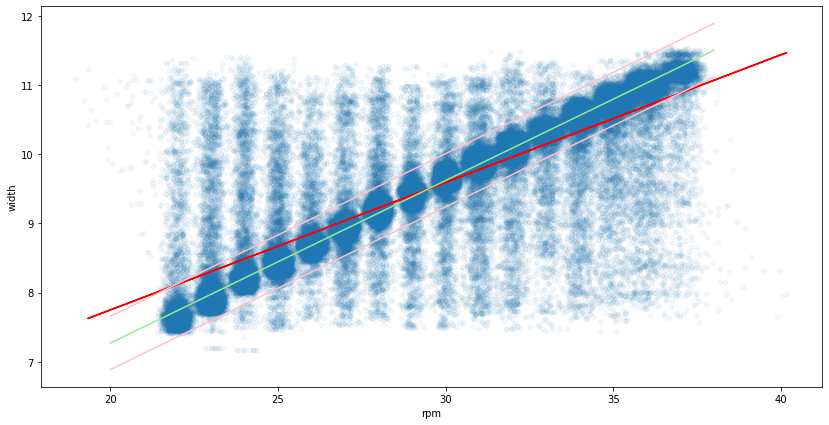

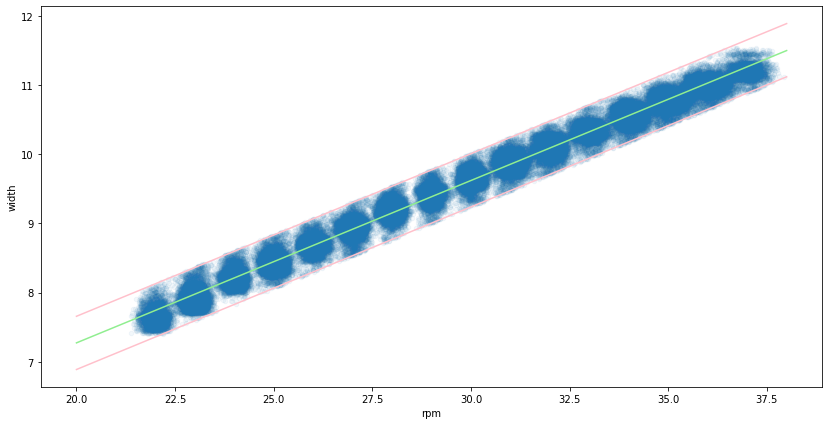

In [8]:
# create model
clf_lin = LinearRegression() 

# train model
clf_lin.fit(X_train, y_train)


# predict on test set
y_pred = clf_lin.predict(X_test)


# plot result
df_s_lean.plot.scatter(x='rpm', y='width', alpha = 0.05)
plt.plot(X_test, y_pred, 'r')

a = 0.235311
b = 2.56176

b_down = 2.18
b_up = 2.95


x_man = np.array([20, 38])
y_man      = x_man * a + b
y_man_down = x_man * a + b_down
y_man_up   = x_man * a + b_up

plt.plot(x_man, y_man     , 'lightgreen')
plt.plot(x_man, y_man_down, 'pink')
plt.plot(x_man, y_man_up  , 'pink')

df_trim = df_s_lean[(df_s_lean['width'] < a*df_s_lean['rpm'] + b_up) & 
                    (df_s_lean['width'] > a*df_s_lean['rpm'] + b_down)]


Xt, yt = split_to_np_feat_and_ans(df_trim)
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size=test_size, random_state=42)
clf_lint = LinearRegression() 
clf_lint.fit(Xt_train, yt_train)
# yt_pred = clf_lin.predict(Xt_test)

a, b = clf_lint.coef_[0], clf_lint.intercept_
print('a, b = ', clf_lint.coef_[0], clf_lint.intercept_)

df_trim.plot.scatter(x='rpm', y='width', alpha = 0.05)
plt.plot(x_man, x_man*a + b  , 'lightgreen')
plt.plot(x_man, y_man_down, 'pink')
plt.plot(x_man, y_man_up  , 'pink')

plt.show()

# give_prediction_score(y_test, y_pred)


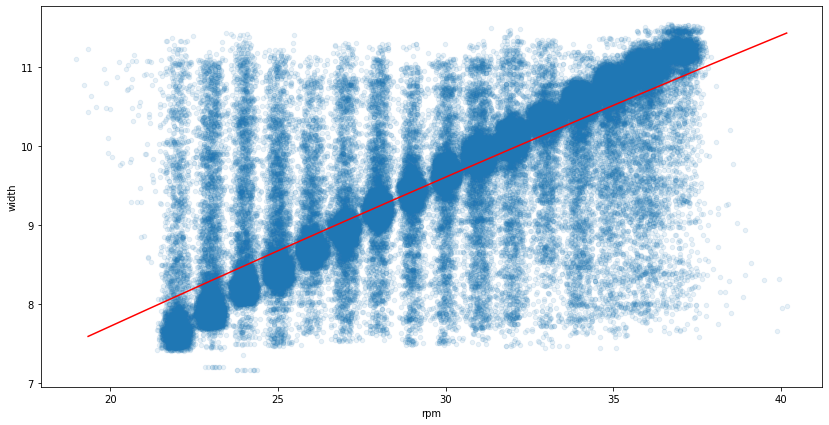

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model=make_pipeline(PolynomialFeatures(2),LinearRegression())

# predict on test set 
poly_model.fit(X, y)
y_pred = poly_model.predict(X_test)

ind = (np.argsort(X_test, 0))
X_test = X_test[ind].reshape(-1,1)
y_pred = y_pred[ind]

# plot result
df_s_lean.plot.scatter(x='rpm', y='width', alpha = 0.1)
plt.plot(X_test, y_pred, 'r', markersize=1)
# plt.xlim(29.75, 30.25)
# plt.ylim(9.3, 9.4)
plt.show()


# give_prediction_score(y_test, y_pred)

#### True outcome vs. the expected outcome of the linear model 

coefficients: 
 0.23499146883303898
intercept: 
 2.571718828119752


vals 8190 and 8300: 
7.9077588816416915
9.553211173044195


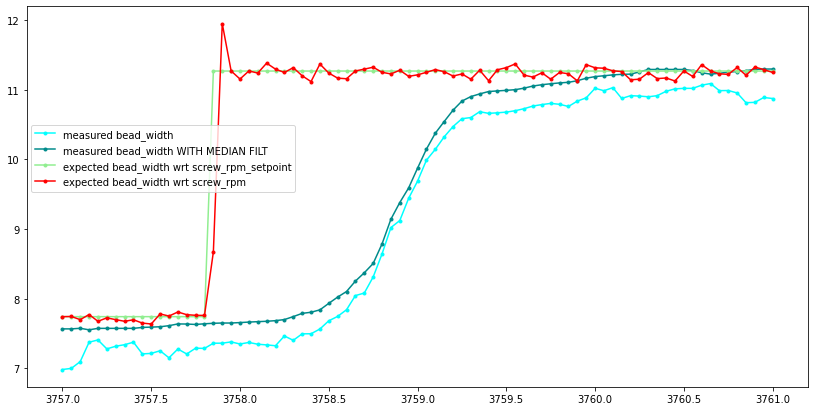

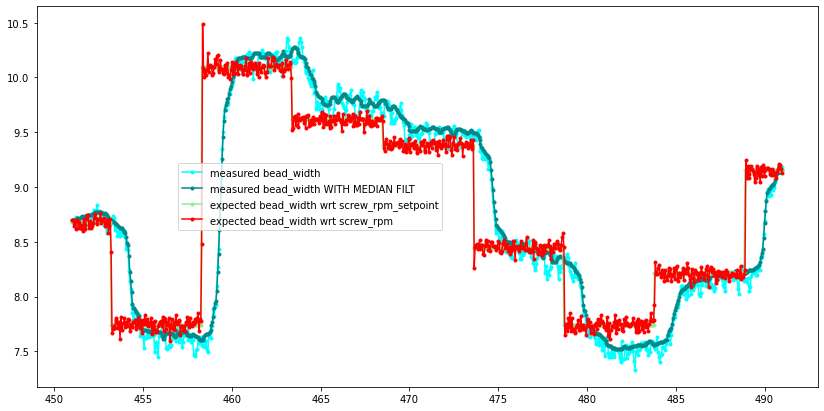

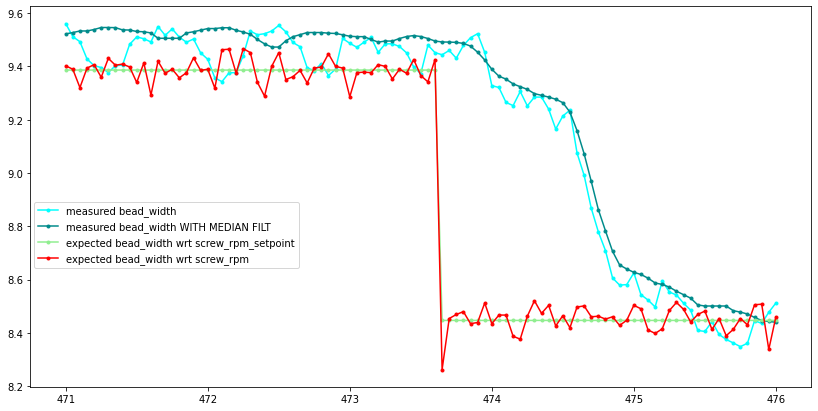

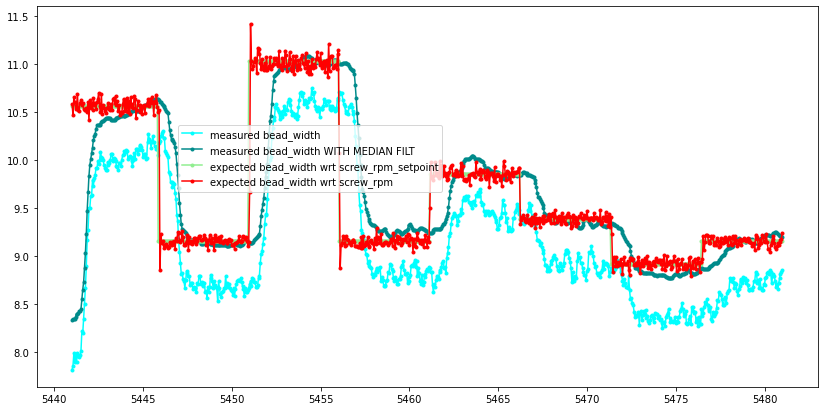

In [10]:
# # fit parameters
# a = clf_lin.coef_[0]
# b = clf_lin.intercept_


# a = 0.23
# b=  2.5


# print
print("coefficients: \n", a)
print("intercept: \n", b)

# making database with expected output/bead width
df_eo = df_s.copy(deep=True)
df_eo['exp_width'] = df_eo['rpm'] * a + b
df_eo['exp_width_sp'] = df_eo['rpm_sp'] * a + b

# making copy of original df and aligning index
df_s_copy = df_s.copy(deep=True)
# df_s_copy.drop(df_s_copy.head(head_tails).index.union(df_s_copy.tail(head_tails).index), inplace=True)
# df_s_copy = df_s_copy.reset_index()

print('\n\nvals 8190 and 8300: ')
print(df_eo.loc[8190, 'width'])
print(df_eo.loc[8300, 'width'])

# plotting
start =  3756 * 20
stop  =  3760 * 20

start_stop_pairs = [[3756 * 20, 3760 * 20], 
                    [450 * 20, 490 * 20], 
                    [470 * 20, 475 * 20], 
                    [5440 * 20, 5480 * 20]
                   ]

for ss_pair in start_stop_pairs:
    start, stop = ss_pair
    plt.plot(df_s_no_filt.loc[start:stop, 'time'], df_s_no_filt.loc[start:stop, 'width'], 'cyan', marker = '.', label='measured bead_width')
    plt.plot(df_eo.loc[start:stop, 'time'], df_eo.loc[start:stop, 'width'], 'darkcyan', marker = '.', label='measured bead_width WITH MEDIAN FILT')
    plt.plot(df_eo.loc[start:stop, 'time'], df_eo.loc[start:stop, 'exp_width_sp'], 'lightgreen', marker = '.', label='expected bead_width wrt screw_rpm_setpoint')
    plt.plot(df_eo.loc[start:stop, 'time'], df_eo.loc[start:stop, 'exp_width'], 'red', marker = '.', label='expected bead_width wrt screw_rpm')

    plt.legend( bbox_to_anchor=(0.35, 0.5), fancybox=True)
    plt.show()




## Leuke ideeen en inzichten

- het gemiste volume aan plastic als gevolg van de lag in de extrusie. Evt. te koppelen aan de jerk settings. 
- jerk/snelheid 
- als de schroef rpm wordt gekoppeld aan een maximale jerk setting, en dus langzaam wordt afgeschaald ipv stepfunties maakt, volgt het extrusie volume dan meer het gewenste profiel? 
- een flexbot oplossing zou er anders uit kunnen zien dan een extruder only oplossing!  
- ik kom van van een snelheid en ik moet de bocht om met een bepaalde snelheid, hoe ziet dat verloop functie eruit? Kan de snelheid vd robot dit volgen? past dat binnen de jerk/acc limieten? 
- 

- Gemiddelde delay? per stap? per begin? 
- per rpm change de grafiekjes normalizeren, overleggen en middelen
- kleuren per stap grootte -> conclusies






In [11]:
if False:
    # ilustrationg the steps made

    df_np = np.array(df_eo)
    df_np_cols = ['time', 'width', 'rpm', 'rpm_sp', 'torque',              # 0 to 4
                  'hz1', 'hz1_sp', 'hz2', 'hz2_sp', 'hz3',                 # 5 to 9
                  'hz3_sp', 'hz4', 'hz4_sp', 'exp_width', 'exp_width_sp']  # 10 to 14

    # getting the right rpm data from the dataset
    chng_idx  = df_np[:-1, 3] != df_np[1:, 3]
    chng_from = df_np[:-1,3][chng_idx]
    chng_to   = df_np[1:,3][chng_idx]
    chng_step = chng_to - chng_from

    # histograms of the from/to/step rpms
    sns.histplot(chng_from, binwidth=1, kde=True)
    plt.title('Histogram of changes from')
    plt.show()
    # ---
    sns.histplot(chng_to, binwidth=1, kde=True)
    plt.title('Histogram of change to')
    plt.show()
    # ---
    sns.histplot(chng_step, binwidth=1, kde=True)
    plt.title('Histogram of change steps')
    plt.show()

    # making the from/to heatmap
    min_rpm = min(chng_to)
    max_rpm = max(chng_to)

    matrix_size = int(max_rpm - min_rpm + 1)
    from_to_matrix = np.zeros((matrix_size, matrix_size))
    missing_matrix = np.zeros((matrix_size, matrix_size))

    # using nice ticks in the heatmap
    ticks = np.linspace(min_rpm, max_rpm, matrix_size)
    ticks = ticks.astype('int')
    size_ticks = np.linspace(0, matrix_size-1, matrix_size)+.5

    for i, j in zip(chng_from, chng_to):
        from_to_matrix[int(i - min_rpm), int(j-min_rpm)] += 1
        missing_matrix[int(i - min_rpm), int(j-min_rpm)] = 1

    # plotting the heatmap, annotated the number of occurences inside
    ax = sns.heatmap(from_to_matrix, linewidth=0.5, annot=True)
    plt.title('from-to counter matrix')
    plt.ylabel('rpm from')
    plt.xlabel('rpm to')
    plt.text(2.2, 9.8, 'down jumps' , fontsize=20, color='cyan', weight='bold')
    plt.text(9.2, 3.8, 'up jumps' , fontsize=20, color='cyan', weight='bold')
    plt.xticks(size_ticks, ticks)
    plt.yticks(size_ticks, ticks)
    plt.show()

    # clearly showing the missing jumps. 
    ax = sns.heatmap(missing_matrix, linewidth=0.5)
    plt.title('missing steps matrix matrix')
    plt.ylabel('rpm from')
    plt.xlabel('rpm to')
    plt.text(2.2, 9.8, 'down jumps' , fontsize=20)
    plt.text(9.2, 3.8, 'up jumps' , fontsize=20)
    plt.xticks(size_ticks, ticks)
    plt.yticks(size_ticks, ticks)
    plt.show()


In [12]:
if False:
    # point of concept for one from/to combination

    # test: 36 to 31

    sns.set_style("darkgrid")

    idx_test_idx = chng_idx == True
    idx_test_frm = df_np[:-1,3] == 36
    idx_test_to  = df_np[1:,3] == 31

    idx_test = np.where((idx_test_idx * idx_test_frm * idx_test_to) == True)[0]

    # defining window
    res = 20
    seconds_before = 2
    seconds_after = 3
    points_b = seconds_before * res
    points_a = seconds_after * res
    x = np.linspace(-seconds_before, seconds_after, points_a + points_b+1)
    y = np.zeros((len(idx_test),points_a + points_b +1))
    idx_lst = []

    for i, idx in enumerate(idx_test):
        start = idx - points_b
        stop = idx + points_a
        y[i, :] = np.array(df_eo.loc[start:stop, 'width'])
        plt.plot(x, y[i, :], label=f'{idx}', alpha = 0.2)
        idx_lst.append(idx)

    idx_list = np.array(idx_lst).astype('int')
    som = np.sum(y, axis=0)
    mean = som/11

    # plotting 
    plt.plot(x, mean, label = 'mean')
    plt.xlabel('time after rpm change (s)')
    plt.ylabel('bead width (mm)')
    plt.legend()
    plt.show()

    # plotting normalized mean
    minioem = np.min(mean)
    maxioem = np.max(mean)

    mean_norm = (mean - np.min(mean)) / (maxioem - minioem)

    plt.plot(x, mean_norm, label = 'normalized mean')
    plt.xlabel('time after rpm change (s)')
    plt.ylabel('bead width (mm)')
    plt.legend()
    plt.plot()
    

In [13]:
if False:

    # for all kinds of jumps. 

    # defining window
    res = 20  # resolution of the datapoints, do not change unless data retrieving method is changed too. 
    seconds_before = 1
    seconds_after = 3
    points_b = seconds_before * res
    points_a = seconds_after * res
    x = np.linspace(-seconds_before, seconds_after, points_a + points_b+1)

    # change width df to numpy array for speed
    width = np.array(df_eo['width'])
    rpm_sp = np.array(df_eo['rpm_sp'])

    # getting the right idx numbers of the dataset
    chng_idx_numbers = np.where(chng_idx == True)[0]

    from_to_columns = np.concatenate((chng_from.reshape(-1,1), chng_to.reshape(-1,1)), axis = 1)
    final_sort_idx = np.lexsort((from_to_columns[:,1], from_to_columns[:,0]))
    from_to_columns_sorted = from_to_columns[final_sort_idx]

    # print(final_sort_idx[:30])
    # print(from_to_columns_sorted[0:10,:])
    # print(from_to_columns_sorted[1100:1110,:])

    bin_edges = np.where(from_to_columns_sorted[1:, 1] != from_to_columns_sorted[:-1, 1])[0] + 1  # where jump group changes
    bin_edges = np.append(np.insert(bin_edges, 0, 0), len(chng_from))  # add outer edges to series

    bin_edges_ds = chng_idx_numbers[final_sort_idx[bin_edges[:-1]]]  #  <--- Where all the bin edges are in the dataset (!)
    # print(rpm_sp[bin_edges_ds])
    # print(from_to_columns[final_sort_idx][:10])

    # print('bin_edges are:\n', bin_edges)

    # print('\n\n\n\n------------------ look underneath pls ----------------\nedge sorted (1:from, 2:to) idx for the original dataset!\n\n')

    final_sort_ds_from = chng_idx_numbers[final_sort_idx]      # The idx numbers in which the dataset has the last rpm before change
    final_sort_ds_to   = chng_idx_numbers[final_sort_idx] + 1  # The idx numbers in whicht the dataset has the first rpm after change 

    # print(rpm_sp[final_sort_ds_from][:30])  #            <--- works for rpm FROM !
    # print(rpm_sp[final_sort_ds_to][:30])    #            <--- works for rpm TO !

    x = np.linspace(-seconds_before, seconds_after, points_a + points_b+1)

    sorted_data_dict = {}

    for i, edge in enumerate(bin_edges):
        if i == 0:
            edge_prev = edge
            continue

        n_jumps = edge - edge_prev
        y= np.zeros((n_jumps, points_a + points_b +1))

        for j, k in enumerate(range(edge_prev, edge)):
            ds_idx = chng_idx_numbers[final_sort_idx[k]]
            start = ds_idx - points_b
            stop = ds_idx + points_a
            y[j,:] = width[start:stop+1]
            # plt.plot(x, y[j,:], label=f'{j}', alpha = 0.2)

        mean = np.sum(y, axis=0)/n_jumps

        # minioem = np.min(mean)  #             <-- for normalisation between 0 and 1
        # maxioem = np.max(mean)

        minioem, maxioem = np.quantile(mean, [0.20, 0.80])

        mean_norm = (mean - minioem) / (maxioem - minioem) 
        sorted_data_dict[(rpm_sp[ds_idx], rpm_sp[ds_idx+1])] = mean_norm
        edge_prev = edge

In [14]:
if False:
# plotting here

    items = list(sorted_data_dict.items())
    np.random.seed(42)
    np.random.shuffle(items)

    count = 0
    small_jump_threshold = 3

    for key, line in items:
        b, a = key

        if abs(a-b) < small_jump_threshold:
            count += 1
            continue
        if np.any(line[30:35] > 0.9) & np.any(line[:20] < 0.5):
            print('blauwe uitschieter: ', b, a, 'REMOVED')
            continue 
        if np.any(line[30:35] < 0.5) & np.any(line[:20] > 0.9):
            print('rode uitschieter: ', b, a, '  REMOVED')
            continue
        plt.plot(x, line, label = f'rpms {b}' +r' $\rightarrow$ ' + f'{a}', alpha = 0.1,
        c = cm.bwr((abs(a - b)-7.5)*22), linewidth = 2) 
        # ((a or b)-10)/33

    print(f'{count}  jumps smaller then {small_jump_threshold}       REMOVED ')

    plt.xlabel('time after rpm change (s)')
    plt.ylabel('bead width (mm)')

    plt.show()


56  jumps smaller then or equal to 2 REMOVED 


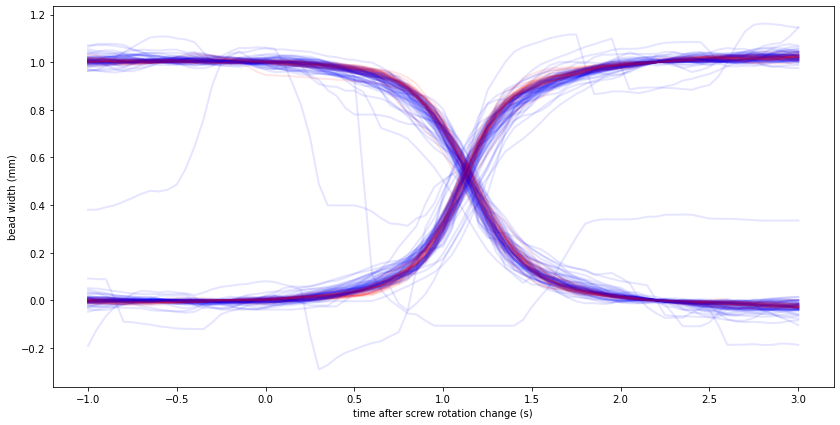

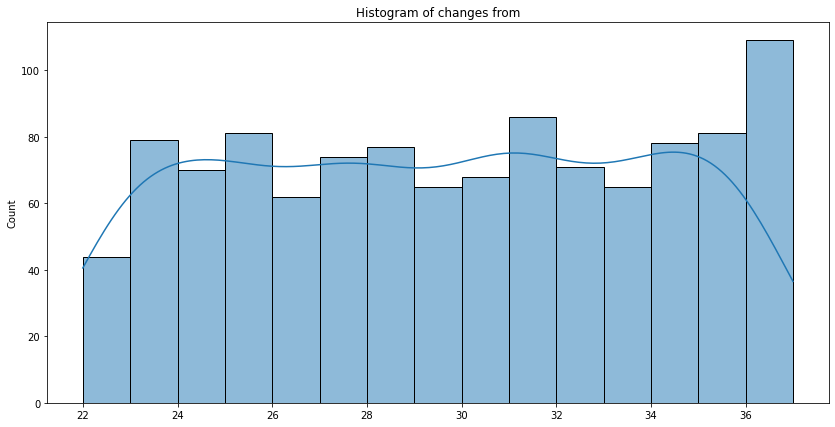

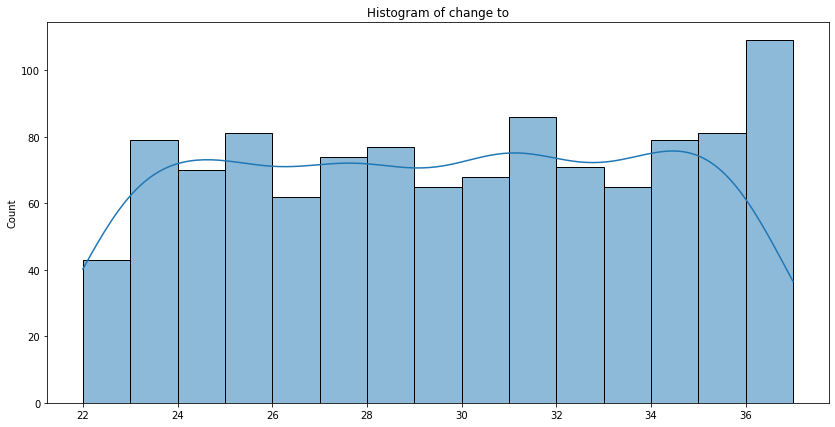

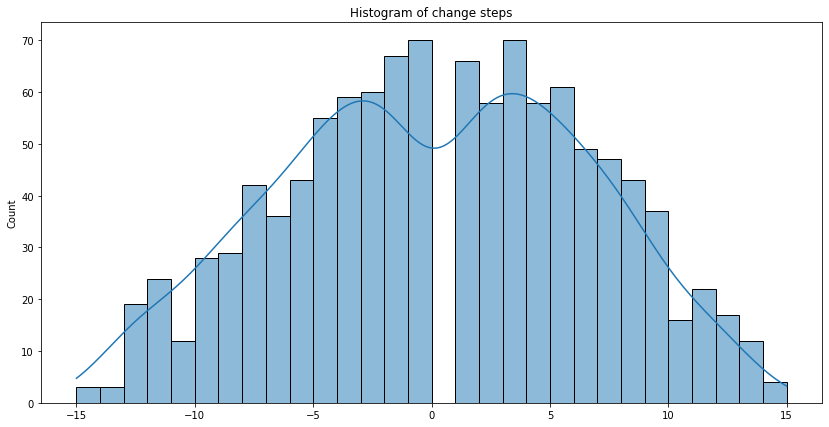

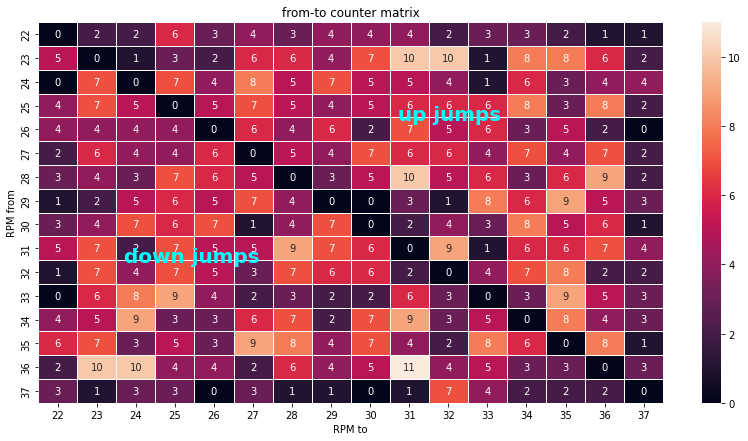

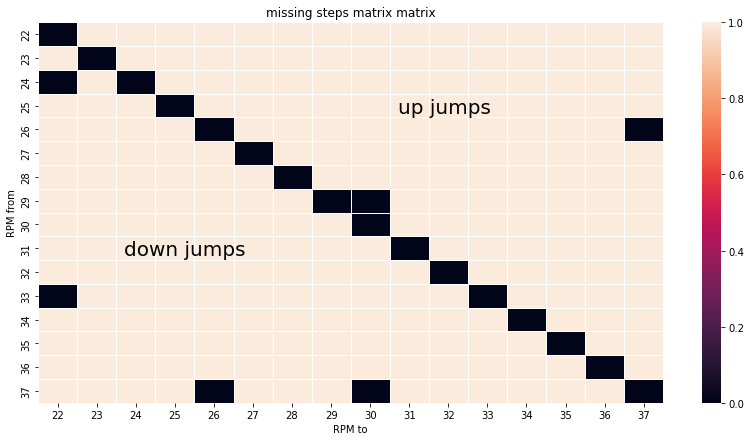

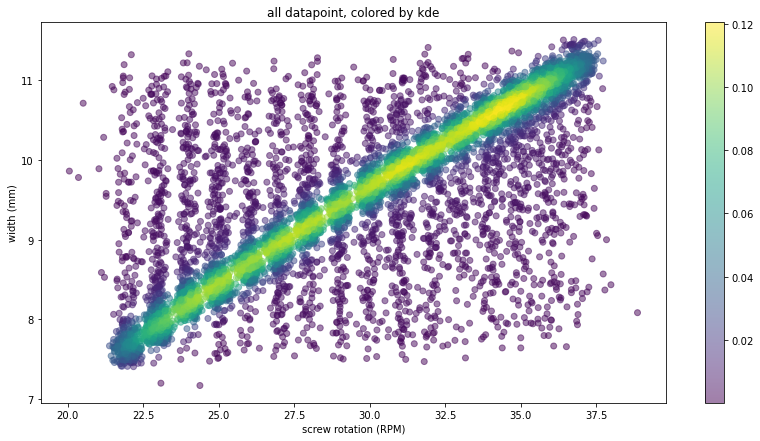

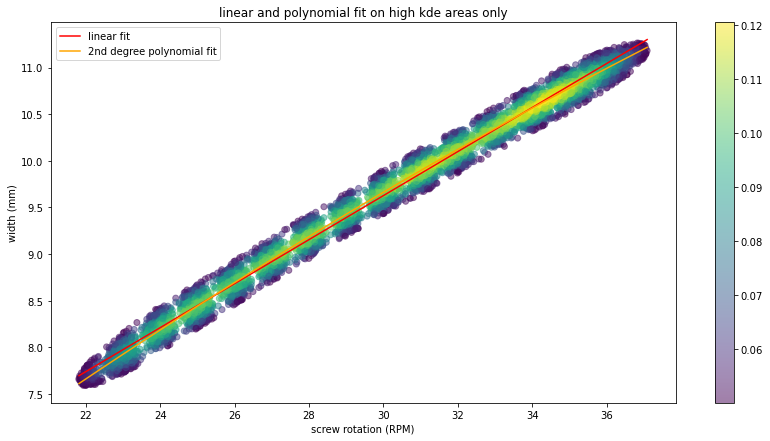

Run is a succes!


In [15]:
petg30gf = TA(df_s)

petg30gf.sort()
petg30gf.fill_dicts()
petg30gf.plot_norm_jumps()
petg30gf.show_rpm_stats()
petg30gf.fit_relations(plot=True)


print('Run is a succes!')

56  jumps smaller then or equal to 2 REMOVED 


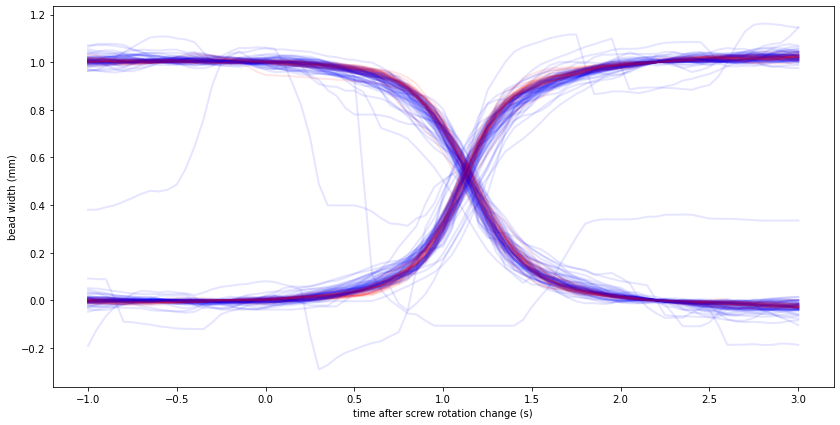

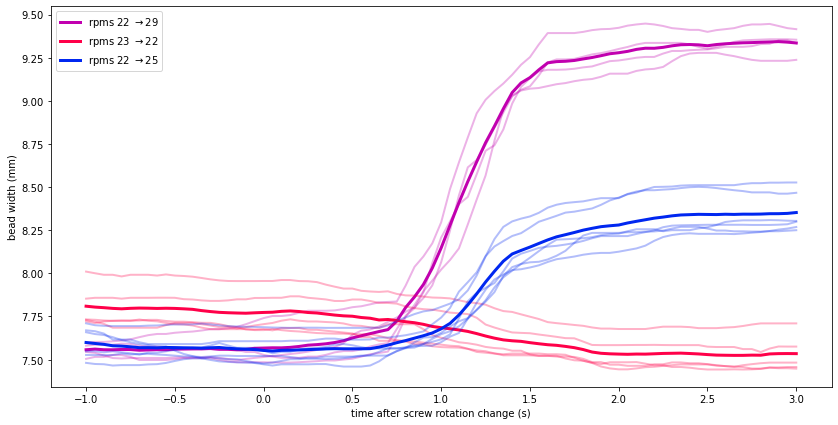

In [16]:
petg30gf.plot_norm_jumps()
jump_list = [[22,37],[22,29],[37,22],[29,22],[23,22],[22,25]]
jump_list = [[22,29],[23,22],[22,25]]
petg30gf.plot_specific_jumps(jump_list)

thres = 0.023887417471200757 not met


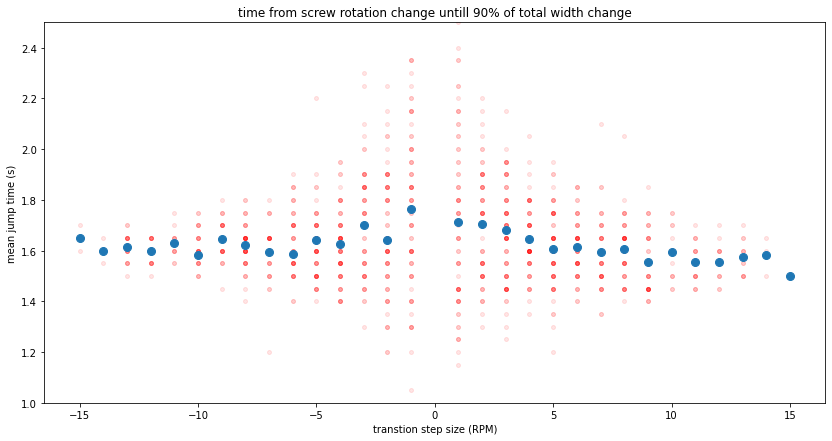

In [17]:
importlib.reload(TransitionAnalyse)
from TransitionAnalyse import TransitionAnalyse as TP

petg30gf.give_mean_jump_time(spread=True)